In [1]:
## importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
## ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
## to get the working directory
os.getcwd()

'C:\\Users\\Admin\\Downloads'

In [4]:
## changing path of directory
os.chdir('C:\\Users\\Admin\\Downloads')

In [5]:
## setting to display max rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

In [6]:
## importing train and test files 

train = pd.read_csv('Hr_train.csv')
test = pd.read_csv('Hr_test.csv')

## rows and col in train and test

display('train',train.shape, 'test',test.shape)

'train'

(54808, 14)

'test'

(23490, 13)

In [7]:
## column names in train and test dataset
display('train',train.columns,'test',test.columns)

## target variable is - is_promoted, this variable is not in test(hve to predict)

'train'

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

'test'

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [8]:
## merging train and test dataset-- 
df = pd.concat([train,test])
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0


In [9]:
## shape of dataset
shape = df.shape
print('Rows and columns in dataset : {}'.format(shape))

Rows and columns in dataset : (78298, 14)


In [10]:
## checking missing values in a dataset --- 

df.isnull().sum()/len(df)*100

# 4.39 perc missing values in education 
#7.5 perc missing values in prev_year_ratings

#is_promoted has missing values because this column is not present in test dataset i.e. 30 perc

employee_id              0.000000
department               0.000000
region                   0.000000
education                4.397303
gender                   0.000000
recruitment_channel      0.000000
no_of_trainings          0.000000
age                      0.000000
previous_year_rating     7.581292
length_of_service        0.000000
KPIs_met >80%            0.000000
awards_won?              0.000000
avg_training_score       0.000000
is_promoted             30.000766
dtype: float64

In [11]:
## duplicate values

df.duplicated().sum()

# 0 duplicate values--


0

In [12]:
test_id = test['employee_id']

In [13]:
#  employee_id column - 

print('No of unique employee id : ', df['employee_id'].nunique())

# no of employee id's is equal to the rows in a dataset 

## so , better to drop this column(not useful for the analysis or prediction purpose)

df.drop('employee_id',axis = 1, inplace = True)

df.columns

No of unique employee id :  78298


Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [14]:
## is_promoted column

df['is_promoted'].value_counts(normalize = True)*100

## 91 perc employees are not promoted
## only 8 perc employees are promoted 

0.0    91.482995
1.0     8.517005
Name: is_promoted, dtype: float64

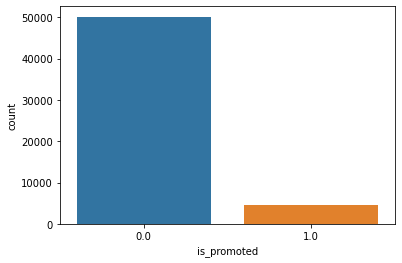

In [15]:
sns.countplot(df['is_promoted']);

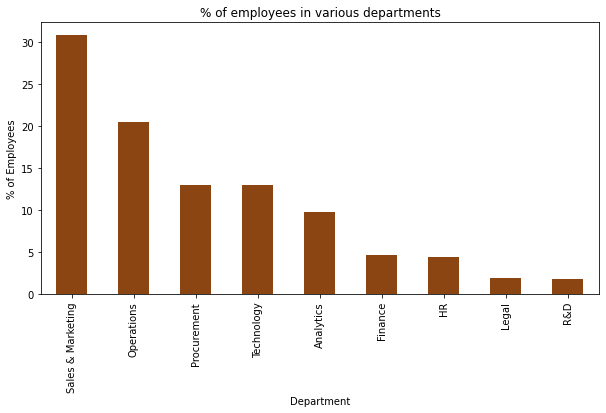

In [16]:
## department column-- 

dep_data = df['department'].value_counts(normalize = True)*100

plt.figure(figsize = (10,5))

plt.xlabel('Department')
plt.ylabel('% of Employees')
plt.title('% of employees in various departments')

dep_data.plot(kind = 'bar',color = 'saddlebrown');


## OBSERVATION - 
# Max of the employees belongs to sales & marketing or operations department
# least no of employees belongs to legal or R&D department

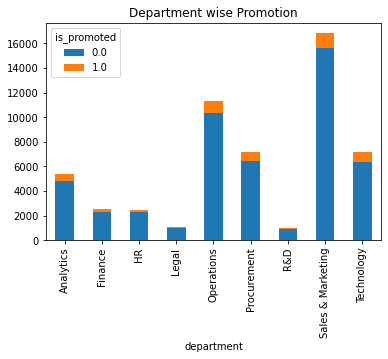

In [17]:
pd.crosstab(df['department'], df['is_promoted']).plot(kind='bar', stacked=True);
plt.title('Department wise Promotion')
plt.show()

No of regions :  34


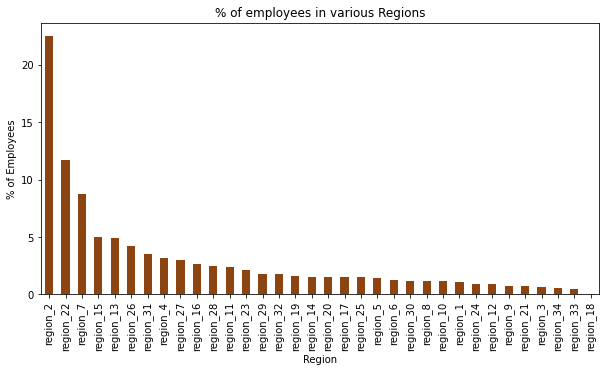

In [18]:
### Region

print('No of regions : ', df['region'].nunique())

# Employees are from 34 different regions

#Region wise count

reg_count = df['region'].value_counts(normalize = True)*100
plt.figure(figsize = (10,5))

plt.xlabel('Region')
plt.ylabel('% of Employees')
plt.title('% of employees in various Regions')

reg_count.plot(kind = 'bar',color = 'saddlebrown');

#Max of the employees belongs to region_2 

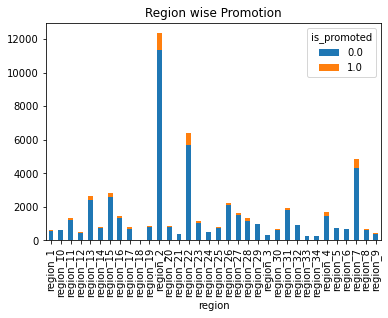

In [19]:
## Region wise promoted or not promoted

pd.crosstab(df['region'], df['is_promoted']).plot(kind='bar', stacked=True);
plt.title('Region wise Promotion')
plt.show()

<AxesSubplot:ylabel='education'>

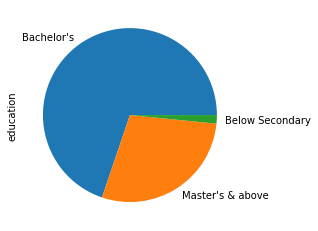

In [20]:
## Education
df['education'].value_counts().plot(kind = 'pie')

# Max of the employees hold bachelors' degree 
#least employees hold below secondary degree

In [21]:
## na values rows

df[df['education'].isnull() == True]


,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0.0
21,Operations,region_15,NaN,m,sourcing,1,41,4.0,11,0,0,57,0.0
32,Sales & Marketing,region_7,NaN,f,sourcing,1,24,1.0,2,0,0,48,0.0
43,Sales & Marketing,region_2,NaN,m,other,3,24,2.0,2,0,0,48,0.0
82,Sales & Marketing,region_2,NaN,m,sourcing,2,25,3.0,2,0,0,53,0.0
87,Sales & Marketing,region_2,NaN,m,sourcing,1,39,1.0,9,0,0,49,0.0
90,Sales & Marketing,region_2,NaN,f,sourcing,1,20,NaN,1,0,0,55,0.0
189,Operations,region_2,NaN,f,other,1,33,4.0,9,0,0,64,0.0
204,Operations,region_16,NaN,f,other,1,31,4.0,2,0,0,62,0.0
231,Sales & Marketing,region_26,NaN,m,other,1,22,4.0,2,0,0,51,0.0


In [22]:
### substituting na values with mode

m = df['education'].mode()[0]


df['education'].fillna(m,inplace = True)

In [23]:
df.isnull().sum()

department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

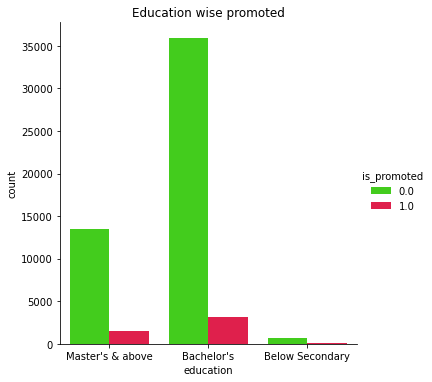

In [24]:
sns.catplot(data = df,x = 'education',kind = 'count',hue = 'is_promoted', palette = 'prism',orient = 'v')
plt.title('Education wise promoted')
plt.show()

<AxesSubplot:ylabel='gender'>

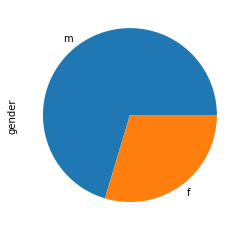

In [25]:
## gender

df['gender'].value_counts().plot(kind = 'pie')

## Max employees are males than females

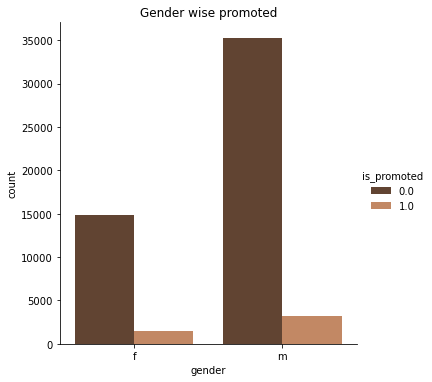

In [26]:
## gender wise Promotion 
sns.catplot(data = df,x = 'gender',kind = 'count',hue = 'is_promoted', palette = 'copper',orient = 'v')
plt.title('Gender wise promoted')
plt.show()





<AxesSubplot:>

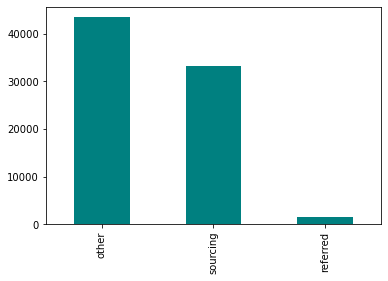

In [27]:
## Recruitment channel

df['recruitment_channel'].value_counts().plot(kind = 'bar', color = 'teal')

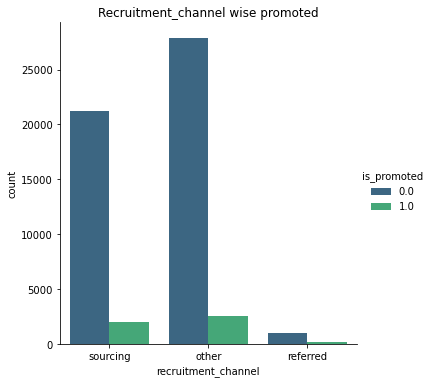

In [28]:
## Recruitment chnnel vs Promoted
 
sns.catplot(data = df,x = 'recruitment_channel',kind = 'count',hue = 'is_promoted', palette = 'viridis',orient = 'v')
plt.title('Recruitment_channel wise promoted')
plt.show()

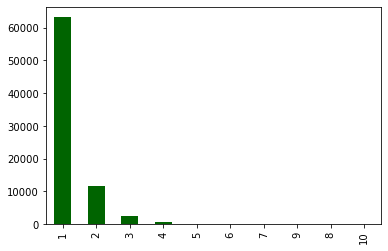

In [29]:
## no_of_trainings
df['no_of_trainings'].value_counts().plot(kind = 'bar',color = 'darkgreen');

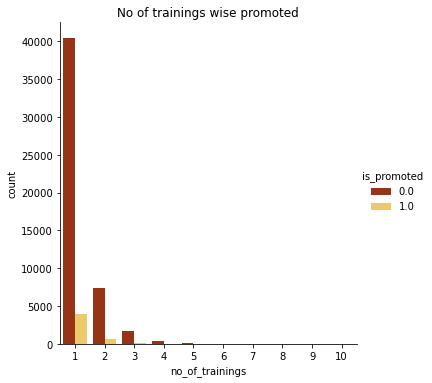

In [30]:
## No _of training wise promoted
sns.catplot(data = df,x = 'no_of_trainings',kind = 'count',hue = 'is_promoted', palette = 'afmhot',orient = 'v')
plt.title('No of trainings wise promoted')
plt.show()

In [31]:
### Age
## creating bins with Age varible

df['age'].describe()

count    78298.000000
mean        34.797619
std          7.665928
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64

In [32]:
bins = [10,20,30,40,50,60]
labels = ['10-20','20-30','30-40','40-50','50-60']

df['age'] = pd.cut(df['age'],bins,labels)

<AxesSubplot:>

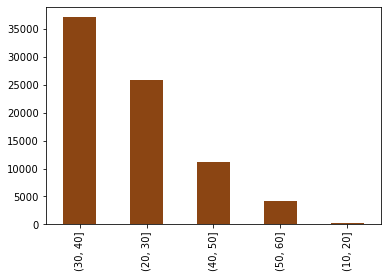

In [33]:
df['age'].value_counts().plot(kind = 'bar', color = 'saddlebrown')

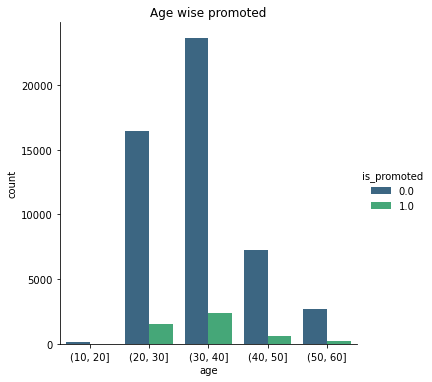

In [34]:
## Age vs Promoted
 
sns.catplot(data = df,x = 'age',kind = 'count',hue = 'is_promoted', palette = 'viridis',orient = 'v')
plt.title('Age wise promoted')
plt.show()

<AxesSubplot:ylabel='previous_year_rating'>

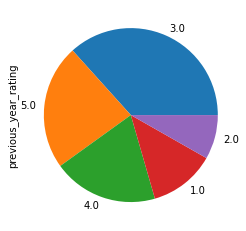

In [35]:
## previous_year_rting

df['previous_year_rating'].value_counts().plot(kind = 'pie')

In [36]:
### substituting na values with mode

a = df['previous_year_rating'].mode()[0]


df['previous_year_rating'].fillna(a,inplace = True)

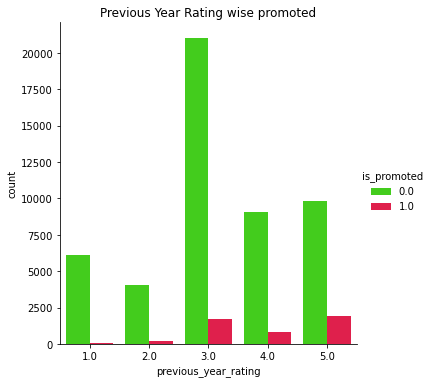

In [37]:
## Previous year ratings vs Promoted

sns.catplot(data = df,x = 'previous_year_rating',kind = 'count',hue = 'is_promoted', palette = 'prism',orient = 'v')
plt.title('Previous Year Rating wise promoted')
plt.show()

<AxesSubplot:>

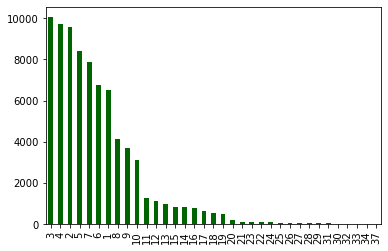

In [38]:
## length_of_service

df['length_of_service'].value_counts().plot(kind = 'bar', color = 'darkgreen')

In [39]:
## Let's make it easy and create bins
bins = [0,10,20,30,40]
labels = ['0-10','10-20','20-30','30-40']

df['length_of_service'] = pd.cut(df['length_of_service'],bins,labels)

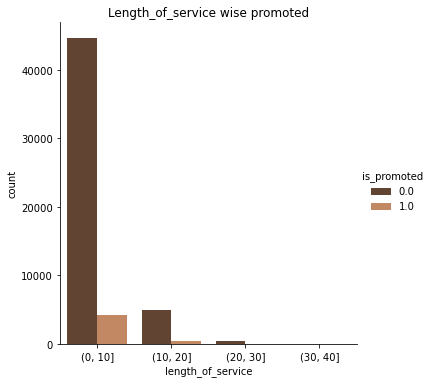

In [40]:
## Length_of_service wise Promotion 
sns.catplot(data = df,x = 'length_of_service',kind = 'count',hue = 'is_promoted', palette = 'copper',orient = 'v')
plt.title('Length_of_service wise promoted')
plt.show()


<AxesSubplot:>

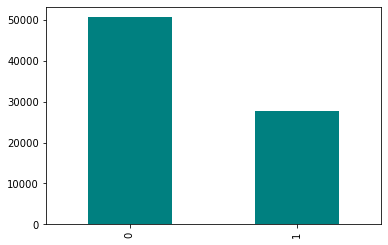

In [41]:
##KPIs_met >80%

df['KPIs_met >80%'].value_counts().plot(kind = 'bar',color = 'teal')

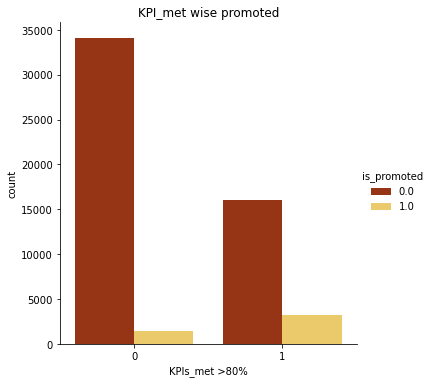

In [42]:
## KPIs_met >80% vs promoted 
sns.catplot(data = df,x = 'KPIs_met >80%',kind = 'count',hue = 'is_promoted', palette = 'afmhot',orient = 'v')
plt.title('KPI_met wise promoted')
plt.show()

<AxesSubplot:ylabel='awards_won?'>

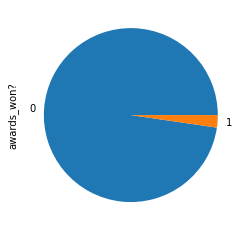

In [43]:
## Awards won
df['awards_won?'].value_counts().plot(kind = 'pie')

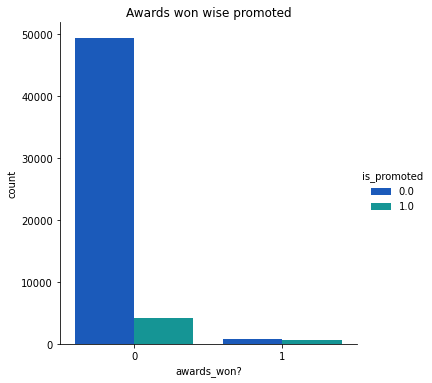

In [44]:
## Awards won vs Promoted 

sns.catplot(data = df,x = 'awards_won?',kind = 'count',hue = 'is_promoted', palette = 'winter',orient = 'v')
plt.title('Awards won wise promoted')
plt.show()

<AxesSubplot:xlabel='avg_training_score', ylabel='Density'>

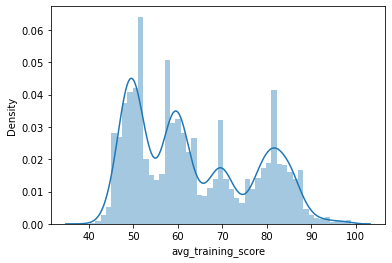

In [45]:
##avg_training_score

sns.distplot(df['avg_training_score'])

## It's normlly distributed

<AxesSubplot:xlabel='is_promoted', ylabel='avg_training_score'>

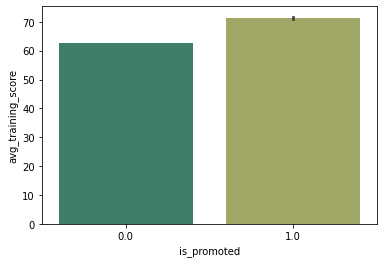

In [46]:
sns.barplot(x = 'is_promoted', y = 'avg_training_score',data = df, palette = 'gist_earth')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   department            78298 non-null  object  
 1   region                78298 non-null  object  
 2   education             78298 non-null  object  
 3   gender                78298 non-null  object  
 4   recruitment_channel   78298 non-null  object  
 5   no_of_trainings       78298 non-null  int64   
 6   age                   78298 non-null  category
 7   previous_year_rating  78298 non-null  float64 
 8   length_of_service     78298 non-null  category
 9   KPIs_met >80%         78298 non-null  int64   
 10  awards_won?           78298 non-null  int64   
 11  avg_training_score    78298 non-null  int64   
 12  is_promoted           54808 non-null  float64 
dtypes: category(2), float64(2), int64(4), object(5)
memory usage: 7.8+ MB


<AxesSubplot:>

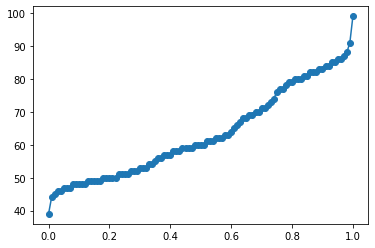

In [48]:
### checking outliers - 
## avg_training_score
df['avg_training_score'].quantile(np.arange(0,1.01,0.01)).plot(kind = 'line', marker = 'o')

## small outlier

In [49]:
df['avg_training_score'] = df['avg_training_score'].apply(lambda x : 92.0 if x > 92.0 else x)

<AxesSubplot:>

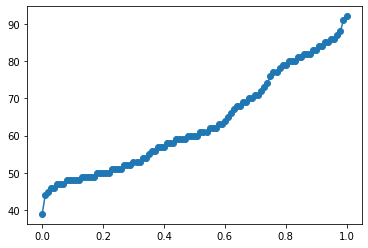

In [50]:
df['avg_training_score'].quantile(np.arange(0,1.01,0.01)).plot(kind = 'line', marker = 'o')


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   department            78298 non-null  object  
 1   region                78298 non-null  object  
 2   education             78298 non-null  object  
 3   gender                78298 non-null  object  
 4   recruitment_channel   78298 non-null  object  
 5   no_of_trainings       78298 non-null  int64   
 6   age                   78298 non-null  category
 7   previous_year_rating  78298 non-null  float64 
 8   length_of_service     78298 non-null  category
 9   KPIs_met >80%         78298 non-null  int64   
 10  awards_won?           78298 non-null  int64   
 11  avg_training_score    78298 non-null  float64 
 12  is_promoted           54808 non-null  float64 
dtypes: category(2), float64(3), int64(3), object(5)
memory usage: 7.8+ MB


In [52]:
###  scaling the numeric features

col = ['no_of_trainings','avg_training_score']

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df.loc[:,col] = sc.fit_transform(df.loc[:,col].values)

In [53]:
### Dummy variables --

df = pd.get_dummies(df)
df.head()

,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,"age_(10, 20]","age_(20, 30]","age_(30, 40]","age_(40, 50]","age_(50, 60]","length_of_service_(0, 10]","length_of_service_(10, 20]","length_of_service_(20, 30]","length_of_service_(30, 40]"
0,-0.417590,5.0,1,0,-1.074749,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0
1,-0.417590,5.0,0,0,-0.249556,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0
2,-0.417590,3.0,0,0,-0.999732,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
3,1.230501,1.0,0,0,-0.999732,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0
4,-0.417590,3.0,0,0,0.725672,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0


In [54]:
## splitting data on train and test 

train = df.iloc[0:54808,]
test = df.iloc[54808:78298,]

In [55]:
x = train.drop('is_promoted',axis = 1)
y = train['is_promoted']

In [56]:
## There is a class imbalance issue, so applying smote so that the model learns properly

from imblearn.over_sampling import SMOTE

smote = SMOTE('minority')

X_sm,Y_sm = smote.fit_sample(x,y)

print('X dataset : ', X_sm.shape, 'Y dataset : ',Y_sm.shape)

X dataset :  (100280, 65) Y dataset :  (100280,)


In [57]:
### Applying train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_sm,Y_sm,test_size = 0.3,random_state = 45)

In [58]:
Y_train.value_counts(normalize = True)*100

1.0    50.142458
0.0    49.857542
Name: is_promoted, dtype: float64

In [59]:
print('length of X train : ', len(X_train), 'Length of Y train : ',len(Y_train))
print('length of X test : ', len(X_test), 'Length of Y test : ', len(Y_test))

length of X train :  70196 Length of Y train :  70196
length of X test :  30084 Length of Y test :  30084


In [60]:
## Applying RF MODEL

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

final_rf = rf_model.fit(X_train,Y_train)

Y_train_pred = final_rf.predict(X_train)

In [61]:
## Checking training accuracy in order to see the fitness of our model

from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(metrics.classification_report(Y_train_pred,Y_train))
print('Accuracy score of RF Model : ', metrics.accuracy_score(Y_train_pred,Y_train))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     34951
         1.0       1.00      0.99      1.00     35245

    accuracy                           1.00     70196
   macro avg       1.00      1.00      1.00     70196
weighted avg       1.00      1.00      1.00     70196

Accuracy score of RF Model :  0.9953701065587782


In [62]:
#### Prediction on test ---- 

y_pred_test = final_rf.predict(X_test)

y_pred_test

array([1., 0., 1., ..., 1., 1., 1.])

In [63]:
### Checking accuracy of test datset 
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print(metrics.classification_report(y_pred_test,Y_test))
print('Accuracy of RF model on test dataset : ',metrics.accuracy_score(y_pred_test,Y_test))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94     15083
         1.0       0.94      0.94      0.94     15001

    accuracy                           0.94     30084
   macro avg       0.94      0.94      0.94     30084
weighted avg       0.94      0.94      0.94     30084

Accuracy of RF model on test dataset :  0.941596862119399


In [64]:
## Not much overfitted - We can use this model further ----- 
test = test.drop('is_promoted',axis = 1)

In [65]:
pred_is_promoted = final_rf.predict(test)

In [66]:
test['is_promoted'] = pred_is_promoted

In [67]:
test['employee_id'] = test_id

In [68]:
sub = test.loc[:,['employee_id','is_promoted']]